# Vehicle Sales Data
_A Project by Andrea Frittella | [LinkedIn Profile](https://www.linkedin.com/in/andreafrittella/)_

---

This project starts from a dataset containing information about vehicle sales in the United States. The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data) and contains information about 558'837 used cars listed for sale.

It encompasses details such as the year (model year), maker, model, trim (vehicle setup/optionals), body type, transmission type, VIN, state of registration, condition rating, odometer reading, exterior and interior colors, seller information, MMR (Manheim Market Report) values, selling prices, sale dates.

We will start by loading the dataset and performing some basic data cleaning and exploration. After that, we will analyze the data to answer some questions and extract insights.

---

## Table of Contents (with links to sections, usable in PDF format conversion)
1. [Data Loading and Cleaning](#data-loading-and-cleaning)
2. [Data Exploration and more cleaning](#data-exploration-and-more-cleaning)
3. [Data Analysis](#data-analysis)
4. [Answers and Conclusions](#answers-and-conclusions)

---

## Data Loading and Cleaning <a name="data-loading-and-cleaning"></a>

In [1]:
#libs for data analysis
import pandas as pd
import numpy as np

#libs for data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
import polars as pl

#libs for file handling
import os

#libs for time handling
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#warning ignoring
import warnings
warnings.filterwarnings("ignore")

Let's start by loading the data into a dataframe and taking a look at the first few rows.

In [2]:
df_source = pd.read_csv(os.getcwd() + '/source_data/cars.csv')
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


We need to rework a little the dataset and start to work on a dataframe copy.

In [3]:
#create a new dataframe "df_edited" and rename some columns to give more context
df_edited = df_source.rename(columns={'year':'my','body':'category','state':'state_sale','make':'maker','color':'ext_color','interior':'int_color', 'sellingprice':'selling_price','saledate':'sale_date'}, inplace=False)

df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   my             558837 non-null  int64  
 1   maker          548536 non-null  object 
 2   model          548438 non-null  object 
 3   trim           548186 non-null  object 
 4   category       545642 non-null  object 
 5   transmission   493485 non-null  object 
 6   vin            558833 non-null  object 
 7   state_sale     558837 non-null  object 
 8   condition      547017 non-null  float64
 9   odometer       558743 non-null  float64
 10  ext_color      558088 non-null  object 
 11  int_color      558088 non-null  object 
 12  seller         558837 non-null  object 
 13  mmr            558799 non-null  float64
 14  selling_price  558825 non-null  float64
 15  sale_date      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Having a look at the info, there is a lot of null values in the columns 'transmission' and some others. Let's evaluate the quota of null values in the dataset and decide how to handle them.

We will also check for duplicates and drop them if necessary.

In [4]:
#evaluate the quota of null values in the dataset per each column. We will use as the max not-null value the number as reference.
dic_quota_null = {}
for column in df_edited.columns:
    dic_quota_null[column] = df_edited[column].isnull().sum() / df_edited.notnull().sum().max() #the quotient of this ratio is the max not-null value considering all the columns
print('column', '-', 'quota of null values')

for i in dic_quota_null:
    print(i, '-', round(dic_quota_null[i]*100,2), '%')

column - quota of null values
my - 0.0 %
maker - 1.84 %
model - 1.86 %
trim - 1.91 %
category - 2.36 %
transmission - 11.69 %
vin - 0.0 %
state_sale - 0.0 %
condition - 2.12 %
odometer - 0.02 %
ext_color - 0.13 %
int_color - 0.13 %
seller - 0.0 %
mmr - 0.01 %
selling_price - 0.0 %
sale_date - 0.0 %


As shown in the previous output, the highest quota is from "transmission" column, with 11.69% of null values. The second highest is the "category" column, with 2.36% of nulla values.

Taking in consideration that we will use only info regarding maker, model and mmr values, we will drop all the rows with null values in these columns.

In [5]:
#Taking in consideration that we will use only info regarding maker, model and mmr values, we will drop all the rows with null values in these columns
df_clean = df_edited.dropna(subset=['maker','model','mmr'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548400 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   my             548400 non-null  int64  
 1   maker          548400 non-null  object 
 2   model          548400 non-null  object 
 3   trim           548050 non-null  object 
 4   category       545506 non-null  object 
 5   transmission   484816 non-null  object 
 6   vin            548400 non-null  object 
 7   state_sale     548400 non-null  object 
 8   condition      536693 non-null  float64
 9   odometer       548310 non-null  float64
 10  ext_color      547671 non-null  object 
 11  int_color      547671 non-null  object 
 12  seller         548400 non-null  object 
 13  mmr            548400 non-null  float64
 14  selling_price  548400 non-null  float64
 15  sale_date      548400 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


The combination of all the line dropping from some of the columns left us with 548'050 rows from columns of interest, which is still a good amount of data to work with: 98.07% of the original dataset (remaining rows / initial rows = 558'837).

Now let's focus on the last column "sale date", converting its type as datetime, and removing the time part: it's not relevant for our analysis.

In [6]:
#let's convert the column "sale_date" to datetime format, with utc parameter as true since the data is in GMT/UTC
df_clean.loc[:, 'sale_date'] = pd.to_datetime(df_clean['sale_date'], utc=True, errors='coerce')

#let's create a new column "sale_date_no_time" with only the date part of the column "sale_date"
df_clean.loc[:, 'sale_date_no_time'] = df_clean['sale_date'].apply(lambda x: x.date() if pd.notnull(x) else None)

#let's convert the column "sale_date_no_time" to datetime format
df_clean['sale_date_no_time'] = pd.to_datetime(df_clean['sale_date_no_time'], format='%Y-%m-%d')

#let's drop the column "sale_date" since we have the column "sale_date_no_time"
df_clean.drop(columns=['sale_date'], inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548400 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   my                 548400 non-null  int64         
 1   maker              548400 non-null  object        
 2   model              548400 non-null  object        
 3   trim               548050 non-null  object        
 4   category           545506 non-null  object        
 5   transmission       484816 non-null  object        
 6   vin                548400 non-null  object        
 7   state_sale         548400 non-null  object        
 8   condition          536693 non-null  float64       
 9   odometer           548310 non-null  float64       
 10  ext_color          547671 non-null  object        
 11  int_color          547671 non-null  object        
 12  seller             548400 non-null  object        
 13  mmr                548400 non-null  float64      

It might be useful to create a new column "age_months" for the vehicles, expressed in months, which will be the difference between the date of the sale and the date of the vehicle. To be able to do this, we need to convert the "year" column to datetime type.

In [7]:
#convert the "year" column to datetime
df_clean['my'] = pd.to_datetime(df_clean['my'], format='%Y')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548400 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   my                 548400 non-null  datetime64[ns]
 1   maker              548400 non-null  object        
 2   model              548400 non-null  object        
 3   trim               548050 non-null  object        
 4   category           545506 non-null  object        
 5   transmission       484816 non-null  object        
 6   vin                548400 non-null  object        
 7   state_sale         548400 non-null  object        
 8   condition          536693 non-null  float64       
 9   odometer           548310 non-null  float64       
 10  ext_color          547671 non-null  object        
 11  int_color          547671 non-null  object        
 12  seller             548400 non-null  object        
 13  mmr                548400 non-null  float64      

In [8]:
#let's create a new column "age_month" with the age of the car in months (float), using the difference between the sale date and the year of the car
avg_day_per_month = 365.25/12
df_clean['age_months'] = round((df_clean['sale_date_no_time'] - df_clean['my']).dt.days / avg_day_per_month,2)
df_clean[['my','sale_date_no_time','age_months']].head()

,my,sale_date_no_time,age_months
0,2015-01-01,2014-12-16,-0.53
1,2015-01-01,2014-12-16,-0.53
2,2014-01-01,2015-01-14,12.42
3,2015-01-01,2015-01-28,0.89
4,2014-01-01,2014-12-18,11.53


We see that the "age" column has been created correctly, but it has some negative values. This could seem wrong, but it's not, actually: some vehicles are produced some weeks before the official model year starting date, so it's normal to have some negative values. We will just assign the value 0 to these rows.

In [9]:
#assign value 0 to the column "age_months" for the cars with negative values
df_clean['age_months'] = df_clean['age_months'].apply(lambda x: 0 if x < 0 else x)
df_clean[['my','sale_date_no_time','age_months']].head()

,my,sale_date_no_time,age_months
0,2015-01-01,2014-12-16,0.00
1,2015-01-01,2014-12-16,0.00
2,2014-01-01,2015-01-14,12.42
3,2015-01-01,2015-01-28,0.89
4,2014-01-01,2014-12-18,11.53


---

## Data Exploration and more cleaning <a name="data-exploration-and-more-cleaning"></a>

In this section, we will explore the data to get a better understanding of the dataset, checking the uniquity of the values in some columns, to exclude the ones that are not useful for our analysis, or that has no sense to not be or not to be unique.

1. VIN values

In [10]:
#let's check the VIN column to see if there are any duplicates
result = df_clean['vin'].unique().size == df_clean['vin'].size

print('There are no duplicates in the VIN column:', result)

There are no duplicates in the VIN column: False


Comparing the length of the list of unique values with the length of 'vin' column, the result is "False". It means that there are duplicates in the VIN column.

This does not necessarly mean that the duplicates presence is wrong: some vehicles could have been sold more than once. But we need to verify that all the values from sale date and odomter tied to the duplicated vins value are unique: even if the same vechile could have been sold more than once in the same day, we will exclude this sceanrio, admitting only one sale per day, per vehicle. Same for the odometer: we will assume that the same vehicle could have been sold more than once, in a different day, but the odometer value shall be different.

On the other hand, there are some other columns values that shall to be the same, for the same VIN:
- model year,
- maker,
- model,
- trim,
- category,
- transmission,
- external and intarnal color.

Those columns describe the vehicle itself, and they should not change between two sales of the same vehicle, represented by the same VIN. 

In [11]:
#let's create a list of the values of duplicated VIN values
duplicated_vins = df_clean[df_clean['vin'].duplicated()]['vin'].unique().tolist()

print(f'We have {len(duplicated_vins)} duplicated VINs in the dataset.')

We have 8133 duplicated VINs in the dataset.


2. Sale Date and other investigations

In [12]:
#let's create a dictionary with the duplicated VIN values as keys and the amount of each duplicated value of the sale_date_no_time as value
dic_duplicated_vins = {} #emtpy dictionary

for i in duplicated_vins:
    dic_duplicated_vins[i] = df_clean[df_clean['vin'] == i]['sale_date_no_time'].duplicated().sum()
    
#craete a list of the VIN keys with a value greater than 0
vins_of_interest = [key for key, value in dic_duplicated_vins.items() if value > 0]

print(f'We have {len(vins_of_interest)} duplicated VINs with more than one duplicated sale date in the dataset.')
print(f'The first 3 duplicated VINs with more than one sale date are: {vins_of_interest[:3]}.')

We have 99 duplicated VINs with more than one duplicated sale date in the dataset.
The first 3 duplicated VINs with more than one sale date are: ['2cndl13f056137366', 'wbagn63403ds43612', '1gket63m672242776'].


In [13]:
#let's check if the vin of interest have all at least 1 sale date with the same value
df_clean[df_clean['vin'].isin(vins_of_interest)][['vin','sale_date_no_time']].sort_values('sale_date_no_time').head(10)

,vin,sale_date_no_time
19043,5n1ar18w77c615027,2014-12-17
19019,5n1ar18w77c615027,2014-12-17
27564,1g8js54f42y588994,2014-12-18
29498,1gncs13wxw2254123,2014-12-18
29724,1g1jc1248v7150365,2014-12-18
29771,1g1jc1248v7150365,2014-12-18
24850,1n4bl11d44c166703,2014-12-18
23745,2g4ws52j141171868,2014-12-18
23671,2g4ws52j141171868,2014-12-18
23612,2hnyd182x4h516719,2014-12-18


The presence of items from "vins_of_interest" list demonstrate that there are some rows with a duplicated VINs that have also the same sale date duplicates. This is not possible, as we assumed that the same vehicle could have been sold more than once, but not in the same day. We will drop these rows.

In [14]:
#let's save only the first rows that are in the list "vins_of_interest" and that have duplicated value in the column "sale_date_no_time"
df_clean = df_clean.groupby('vin').apply(lambda x: x.drop_duplicates(subset=['sale_date_no_time'], keep='first')).reset_index(drop=True)

At this point we need to investigate on the other values of the duplicated vins from the vins of interest.

In [15]:
df_clean[df_clean['vin'].isin(vins_of_interest)][['vin','sale_date_no_time']].sort_values('sale_date_no_time').head(10)

,vin,sale_date_no_time
373824,5n1ar18w77c615027,2014-12-17
127672,1g8js54f42y588994,2014-12-18
137872,1gket63m672242776,2014-12-18
509967,wbagn63403ds43612,2014-12-18
235976,2cndl13f056137366,2014-12-18
260850,2g4ws52j141171868,2014-12-18
73341,1fmru17lxxlb48758,2014-12-18
141678,1gncs13wxw2254123,2014-12-18
271535,2hnyd182x4h516719,2014-12-18
103063,1g1jc1248v7150365,2014-12-18


Here is important to note that we have performed this crucial and complex cleaning: before the operation, the "sale_date_no_time" value" 2014-12-31" was shared among 6 entries, with 3 unique vin values (A, B, C):

| vin                     | sale_date_no_time |
|-------------------------|-------------------|
| A: 2c3la63h26h278454    | 2014-12-31        |
| B: 1ftpw14588fa92105    | 2014-12-31        |
| C: 1zvft80n255109966    | 2014-12-31        |
| A: 1ftpw14588fa92105    | 2014-12-31        |
| B: 2c3la63h26h278454    | 2014-12-31        |
| C: 1zvft80n255109966    | 2014-12-31        |

After the cleaning, we have not mistakenly removed (absolute) duplicates values of "sale_date_no_time" column: we correclty admitted (absolute) "sale_date_no_time" duplicates, but only for different "vin" values:

| vin                     | sale_date_no_time |
|-------------------------|-------------------|
| C: 1zvft80n255109966    | 2014-12-31        |
| A: 2c3la63h26h278454    | 2014-12-31        |
| B: 1ftpw14588fa92105    | 2014-12-31        |


In [16]:
df_clean.describe()

,my,condition,odometer,mmr,selling_price,sale_date_no_time,age_months
count,548301,536603.000000,548211.000000,548301.000000,548301.000000,548301,548301.000000
mean,2010-02-11 18:51:29.664983296,30.777992,67530.218137,13849.811144,13690.343040,2015-03-05 03:43:41.678968320,60.693892
min,1984-01-01 00:00:00,1.000000,1.000000,25.000000,1.000000,2014-01-01 00:00:00,0.000000
25%,2008-01-01 00:00:00,24.000000,28141.000000,7275.000000,7000.000000,2015-01-20 00:00:00,25.530000
50%,2012-01-01 00:00:00,35.000000,51402.000000,12350.000000,12200.000000,2015-02-12 00:00:00,41.030000
75%,2013-01-01 00:00:00,42.000000,97913.000000,18400.000000,18300.000000,2015-05-21 00:00:00,89.000000
max,2015-01-01 00:00:00,49.000000,999999.000000,182000.000000,230000.000000,2015-07-20 00:00:00,372.140000
std,NaN,13.375135,52901.089173,9630.308537,9701.712226,NaN,46.687961


There are some strange rows in the resulting dataframe:
- min odomter value is 1, which is not possible. We want to allow only values greater than 50,
- min selling price is 1, which is not possible. We want to allow only values greater than 100.

In [17]:
#let's drop the rows that does not respect our analysis criteria
df_clean = df_clean[(df_clean['odometer'] >= 50) & (df_clean['selling_price'] >= 100)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546653 entries, 0 to 548300
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   my                 546653 non-null  datetime64[ns]
 1   maker              546653 non-null  object        
 2   model              546653 non-null  object        
 3   trim               546309 non-null  object        
 4   category           543779 non-null  object        
 5   transmission       483360 non-null  object        
 6   vin                546653 non-null  object        
 7   state_sale         546653 non-null  object        
 8   condition          535117 non-null  float64       
 9   odometer           546653 non-null  float64       
 10  ext_color          545950 non-null  object        
 11  int_color          545950 non-null  object        
 12  seller             546653 non-null  object        
 13  mmr                546653 non-null  float64      

Let's check now if there are still some other strange min value in other columns.

In [18]:
df_clean.describe()

,my,condition,odometer,mmr,selling_price,sale_date_no_time,age_months
count,546653,535117.000000,546653.000000,546653.000000,546653.000000,546653,546653.000000
mean,2010-02-16 07:28:12.040105728,30.826202,67722.149283,13861.041785,13712.304742,2015-03-05 04:45:09.998481664,60.546613
min,1984-01-01 00:00:00,1.000000,50.000000,25.000000,100.000000,2014-01-01 00:00:00,0.000000
25%,2008-01-01 00:00:00,24.000000,28314.000000,7300.000000,7100.000000,2015-01-20 00:00:00,25.530000
50%,2012-01-01 00:00:00,35.000000,51595.000000,12350.000000,12200.000000,2015-02-12 00:00:00,41.000000
75%,2013-01-01 00:00:00,42.000000,98058.000000,18400.000000,18300.000000,2015-05-21 00:00:00,88.970000
max,2015-01-01 00:00:00,49.000000,999999.000000,182000.000000,230000.000000,2015-07-13 00:00:00,372.140000
std,NaN,13.340639,52852.808292,9626.356168,9691.530963,NaN,46.530827


The mmr values seems ok: mmr is a value that is calculated by the Manheim Market Report, and it's not a real value, but a reference value. It's normal to have some low values, as it's a reference value, and it's not the real selling price.

It  might be a good idea to create a new column "gain_pct" that will be the difference between the selling price and the mmr value, divided by the mmr value. This will give us an idea of the gain percentage of the selling price, compared to the mmr value.

In [19]:
df_clean['gain_pct'] = round(((df_clean['selling_price'] - df_clean['mmr']) / df_clean['mmr']) * 100,2)
df_clean['gain_pct'].describe()

count    546653.000000
mean         -0.549238
std          37.317053
min         -97.710000
25%          -7.360000
50%          -0.400000
75%           5.540000
max        8033.330000
Name: gain_pct, dtype: float64

The gain percentage is calculated correctly, but there is a min and max value that are very large: -97.71% as min and 8033.33% as max. We need to filter, allowing only values between -50% and 200%.

In [20]:
df_clean = df_clean[(df_clean['gain_pct'] >= -50) & (df_clean['gain_pct'] <= 200)]
df_clean['gain_pct'].describe()

count    533777.000000
mean          0.231048
std          18.197539
min         -50.000000
25%          -6.620000
50%          -0.240000
75%           5.700000
max         200.000000
Name: gain_pct, dtype: float64

In [21]:
#let's export the dataframe to a csv file
df_clean.to_csv(os.getcwd() + '/clean_data/cars_clean.csv', index=False)

df_clean.describe()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533777 entries, 0 to 548300
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   my                 533777 non-null  datetime64[ns]
 1   maker              533777 non-null  object        
 2   model              533777 non-null  object        
 3   trim               533446 non-null  object        
 4   category           531116 non-null  object        
 5   transmission       471893 non-null  object        
 6   vin                533777 non-null  object        
 7   state_sale         533777 non-null  object        
 8   condition          523040 non-null  float64       
 9   odometer           533777 non-null  float64       
 10  ext_color          533091 non-null  object        
 11  int_color          533091 non-null  object        
 12  seller             533777 non-null  object        
 13  mmr                533777 non-null  float64      

Now all the columns seems to have a coherent value, and we can proceed with the analysis.

_Note: the cleaned dataset is representative of 95.52% (533'777 / 558'837) of the original dataset._

---

## Data Analysis <a name="data-analysis"></a>

Let's imagine some business questions that we need to answer for a Company that is interested in the vehicle sales market.

1. Market Trends Analysis

Business Need: Understand how the used car market has evolved over time.

Possible Reports:
- Sales Volume by Year and Make: Analyze the distribution of vehicle sales by model year and make. This will help identify trends in the popularity of certain brands and models over time.
- Price Trends Over Time: Track the average selling prices and MMR values across different years to see how vehicle values have changed.
- Seasonal Sales Patterns: Investigate if there are specific times of the year when vehicle sales peak or dip.
- Odometer Trends: Analyze the average odometer of the most sold cars.

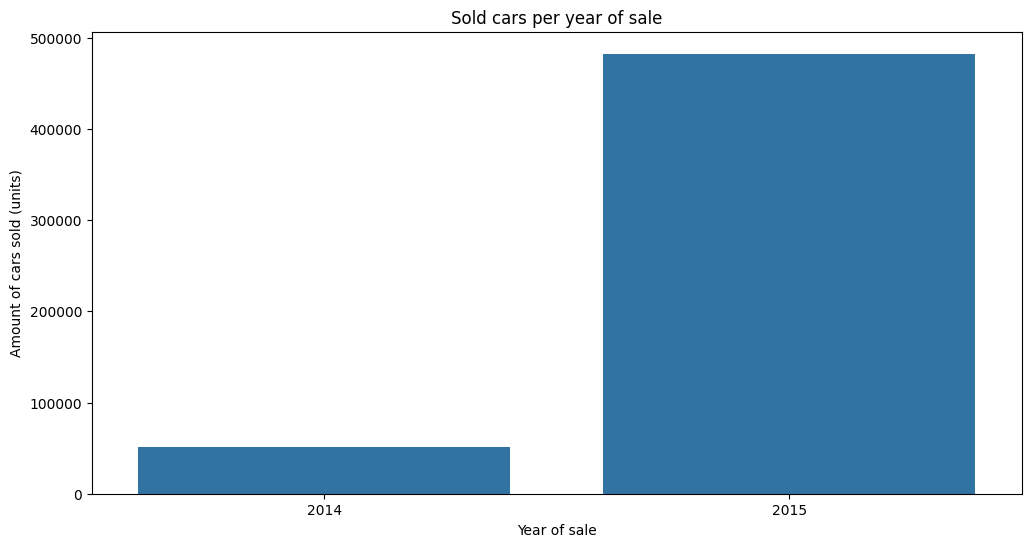

In [22]:
#let's make some plots to visualize the data. We will use the seaborn library for this task.
df_clean['sale_year'] = df_clean['sale_date_no_time'].dt.year

#let's create a graph to visualize the sale volumes (amount of cars sold) per year of sale
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='sale_year')
plt.title('Sold cars per year of sale')
plt.xlabel('Year of sale')
plt.ylabel('Amount of cars sold (units)')
plt.show()

This analysis is not really helpful, as the dataset is not complete: we have only data from 2014 and 2015, and the dataset is not complete for the whole year 2014. We will skip analysis based on sale year comparison.

Let's try to analyze the sales volume by month of the year.

In [23]:
df_clean['sale_month'] = df_clean['sale_date_no_time'].dt.month
df_clean.groupby('sale_year')['sale_month'].unique()

sale_year
2014               [12, 1, 2]
2015    [5, 2, 3, 6, 1, 7, 4]
Name: sale_month, dtype: object

There are holes in the months: there are no data from March to november in 2014, and from August to December in 2015. To use this set to analyze the sales volume by month, might be not the best idea. We will skip this analysis, based on the year of the sale.

Let's check the amount of sales based on the vehicle model year.

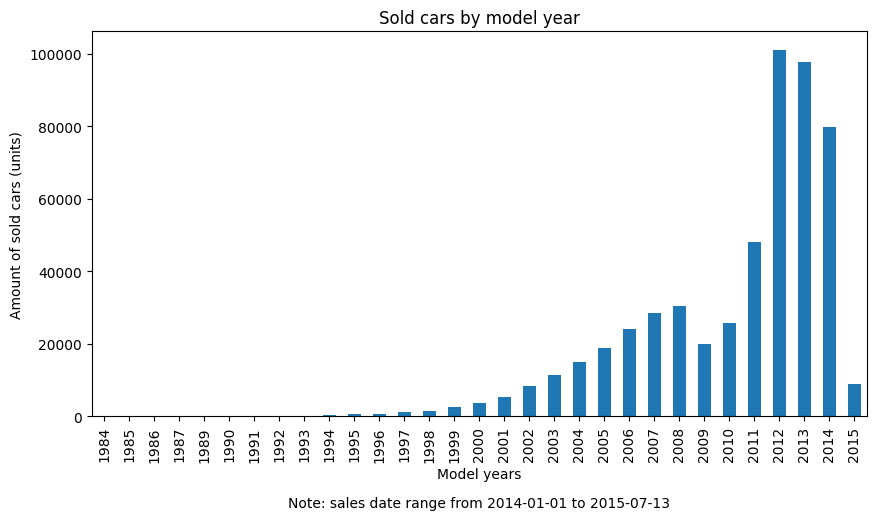

Top 5 model years with more cars sold:


my
2012    101069
2013     97609
2014     79764
2011     47953
2008     30321
Name: count, dtype: int64

In [24]:
#before to start let's check the value range of the "sale_date_no_time" column
min_date = df_clean['sale_date_no_time'].min().strftime('%Y-%m-%d')
max_date = df_clean['sale_date_no_time'].max().strftime('%Y-%m-%d')

df_clean['my'] = df_clean['my'].dt.year #to convert the column "my" to year format as integer value

#let's create a grpah to check the distribution of the sold cars by year, using , and a bar graph
df_clean['my'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Sold cars by model year')
plt.xlabel('Model years')
plt.ylabel('Amount of sold cars (units)')
note =f'Note: sales date range from {min_date} to {max_date}'
plt.text(x=0.5, y=-0.225, s=note, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

print('Top 5 model years with more cars sold:')
df_clean['my'].value_counts().head(5)

We can create a better graph that will show the amount of sales based per each year difference with 2015.

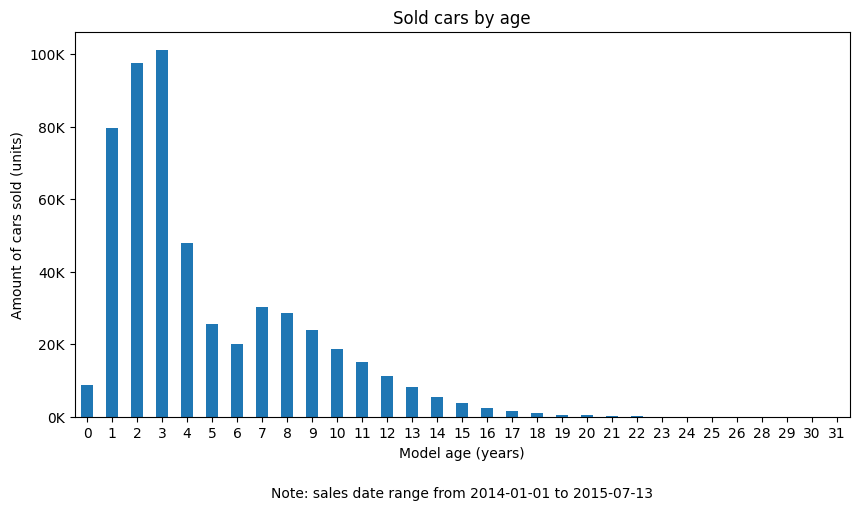

In [25]:
#let's create a graph the amount of sold cars by year difference between the 2015 and the model year
diff_years = 2015 - df_clean['my']
diff_years.value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Sold cars by age')
plt.xlabel('Model age (years)')
plt.ylabel('Amount of cars sold (units)')

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

note =f'Note: sales date range from {min_date} to {max_date}'
plt.text(x=0.5, y=-0.2, s=note, ha='center', va='center', transform=plt.gca().transAxes)
plt.xticks(rotation=0)
plt.show()

Amount of sold cars with an age < 2 years: 79764 (quota: 0.03)
Amount of sold cars with an age >= 2 years: 2450588 (quota: 0.97)


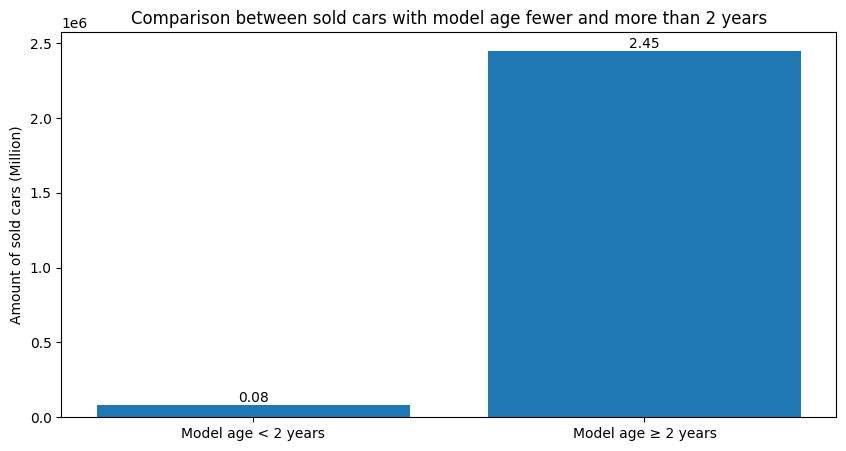

Amount of sold cars with an age < 3 years: 274982 (quota: 0.11)
Amount of sold cars with an age >= 3 years: 2255370 (quota: 0.89)


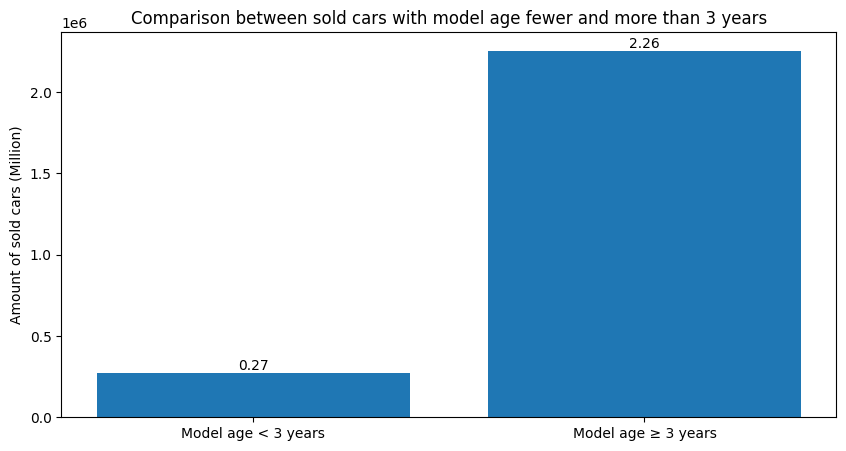

Amount of sold cars with an age < 4 years: 578189 (quota: 0.23)
Amount of sold cars with an age >= 4 years: 1952163 (quota: 0.77)


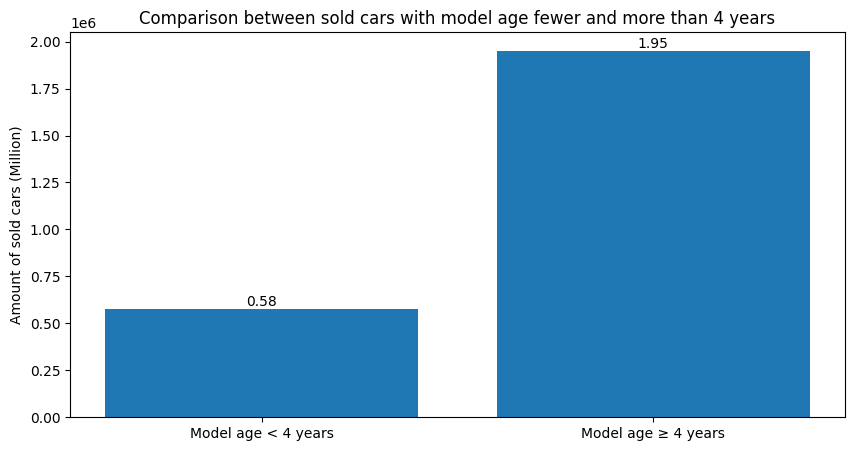

Amount of sold cars with an age < 5 years: 770001 (quota: 0.3)
Amount of sold cars with an age >= 5 years: 1760351 (quota: 0.7)


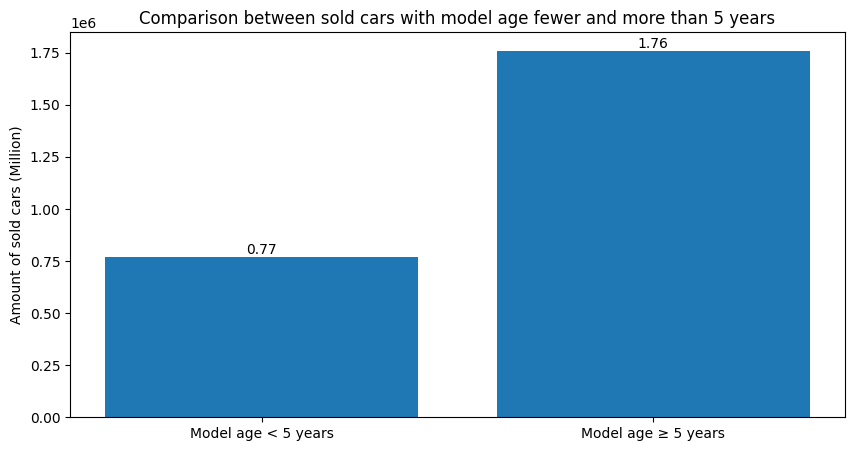

In [26]:
#let's compare the total amount of sold cars with an year difference fewer and more than x years
x = range(2,6,1)

for x in x:
    more_equal_amount = diff_years[diff_years >= x].sum()
    fewer_amount = diff_years[diff_years < x].sum()

    print(f'Amount of sold cars with an age < {x} years:', fewer_amount, f'(quota: {round(fewer_amount/(fewer_amount+more_equal_amount),2)})')
    print(f'Amount of sold cars with an age >= {x} years:', more_equal_amount, f'(quota: {round(more_equal_amount/(fewer_amount+more_equal_amount),2)})')

    #let's create a graph to comapre in the same image the amount of sold cars fewer and more than x years, adding the values in the bars
    plt.figure(figsize=(10,5))
    plt.bar([f'Model age < {x} years',f'Model age ≥ {x} years'],[fewer_amount, more_equal_amount])
    plt.text(0, fewer_amount, round(fewer_amount/1e6,2), ha='center', va='bottom')
    plt.text(1, more_equal_amount, round(more_equal_amount/1e6,2), ha='center', va='bottom')
    plt.title('Comparison between sold cars with model age fewer and more than '+ str(x) + ' years')
    plt.ylabel('Amount of sold cars (Million)')
    plt.show()

We can say that around one third (31%) of all the sales are from vehicles that have an age of 4 years or less. Indicating that the most interesting age for used cards sales is max 4 years.

In case we consider the most profitable vehicles, we can analyze the selling prices values, distributed by the age of the vehicle. Let's do it.

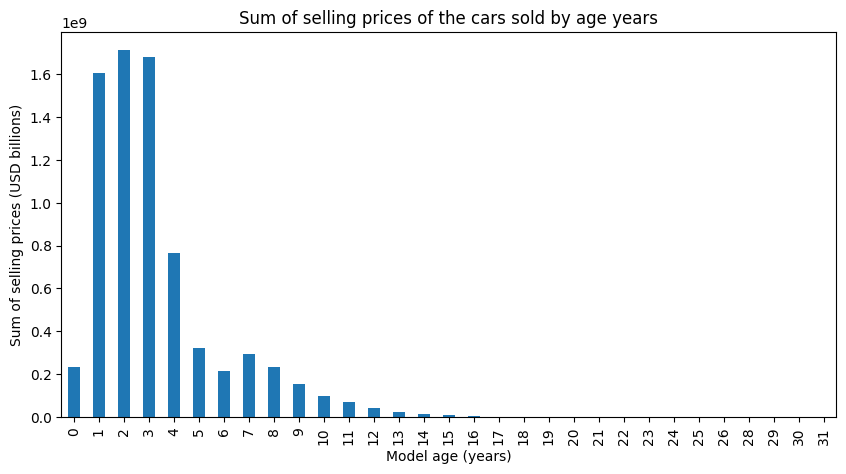

In [27]:
#this time let's create a new column "age_years" in the df, with the age of the car in years (int), using the difference between a fix value of 2015 and the sale date and the year of the car
df_clean['age_years'] = diff_years

#let's create a graph to visualize the sum of all the selling prices of the cars sold by year, grouped by age_years values
df_clean.groupby('age_years')['selling_price'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Sum of selling prices of the cars sold by age years')
plt.xlabel('Model age (years)')
plt.ylabel('Sum of selling prices (USD billions)')
plt.show()

Amount of USD billions sales for models with age < 2 years: 1840146866.0 (quota: 0.25)
Amount of USD billions sales for models with age >= 2 years: 5632479767.0 (quota: 0.75)


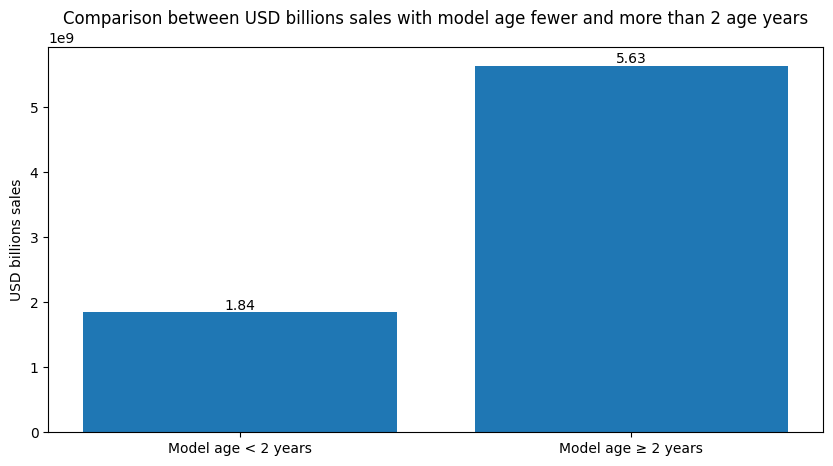

Amount of USD billions sales for models with age < 3 years: 3551609490.0 (quota: 0.48)
Amount of USD billions sales for models with age >= 3 years: 3921017143.0 (quota: 0.52)


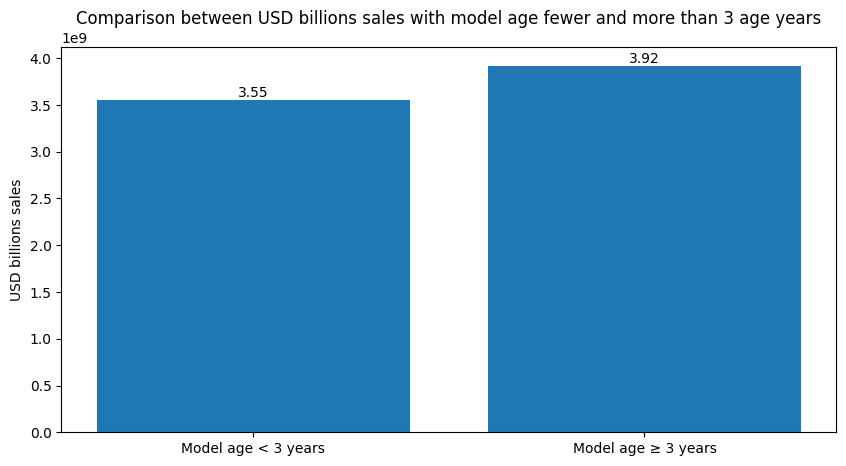

Amount of USD billions sales for models with age < 4 years: 5233024953.0 (quota: 0.7)
Amount of USD billions sales for models with age >= 4 years: 2239601680.0 (quota: 0.3)


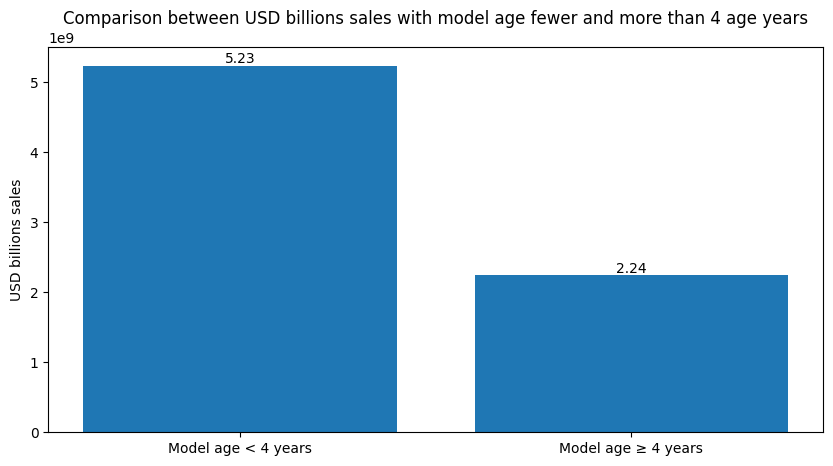

Amount of USD billions sales for models with age < 5 years: 5997427117.0 (quota: 0.8)
Amount of USD billions sales for models with age >= 5 years: 1475199516.0 (quota: 0.2)


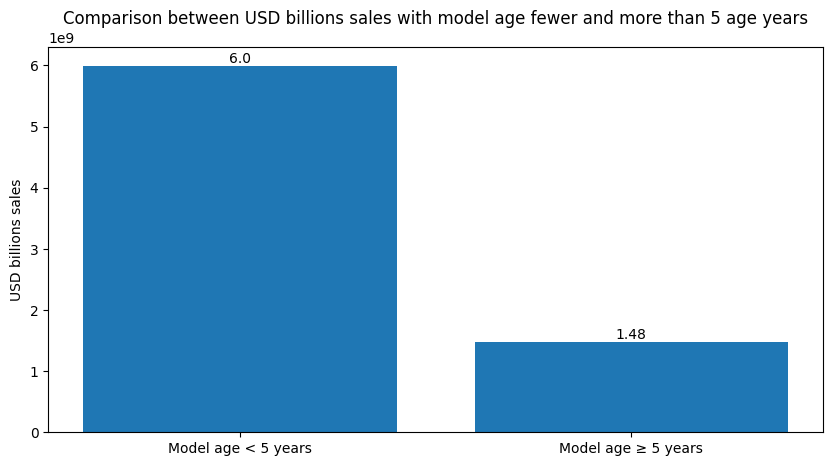

In [28]:
#let's compare the total amount of sold cars with an year difference fewer and more than x years
x = range(2,6,1)

for x in x:
    more_equal_prices = df_clean[df_clean['age_years'] >= x]['selling_price'].sum()
    fewer_prices_prices = df_clean[df_clean['age_years'] < x]['selling_price'].sum()

    print(f'Amount of USD billions sales for models with age < {x} years:', fewer_prices_prices, f'(quota: {round(fewer_prices_prices/(fewer_prices_prices+more_equal_prices),2)})')
    print(f'Amount of USD billions sales for models with age >= {x} years:', more_equal_prices, f'(quota: {round(more_equal_prices/(fewer_prices_prices+more_equal_prices),2)})')

    #let's create a graph to comapre in the same image the amount of sold cars fewer and more than x years, adding the values in the bars
    plt.figure(figsize=(10,5))
    plt.bar([f'Model age < {x} years',f'Model age ≥ {x} years'],[fewer_prices_prices, more_equal_prices])
    plt.text(0, fewer_prices_prices, round(fewer_prices_prices/1e9,2), ha='center', va='bottom')
    plt.text(1, more_equal_prices, round(more_equal_prices/1e9,2), ha='center', va='bottom')
    plt.title('Comparison between USD billions sales with model age fewer and more than '+ str(x) + ' age years')
    plt.ylabel('USD billions sales')
    plt.show()

Due to the resulting graph we can affirm that around half of the USD generated by the sales are from vehicles that are 2 years old or less.

So, the gold age for the best sales is 2 years old.

Now let's analyze the odomter values.

---

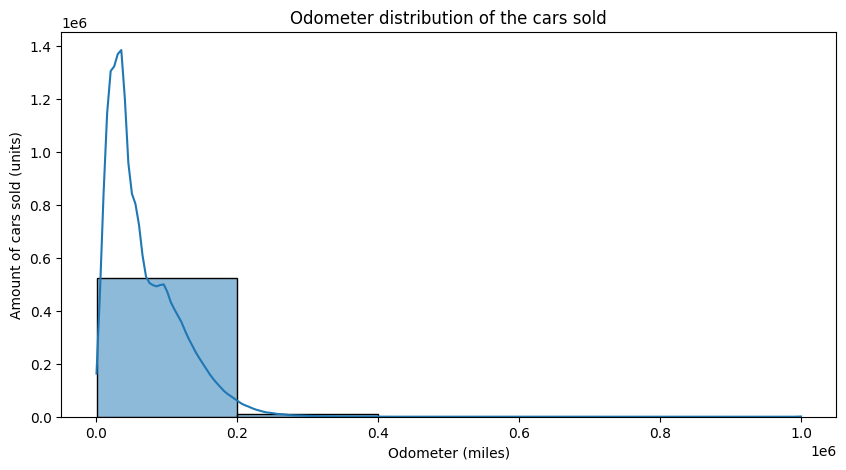

In [29]:
#let's evaluate the odometer distribution of the cars sold
plt.figure(figsize=(10,5))
sns.histplot(df_clean['odometer'], bins=5, kde=True)
plt.title('Odometer distribution of the cars sold')
plt.xlabel('Odometer (miles)')
plt.ylabel('Amount of cars sold (units)')
plt.show()

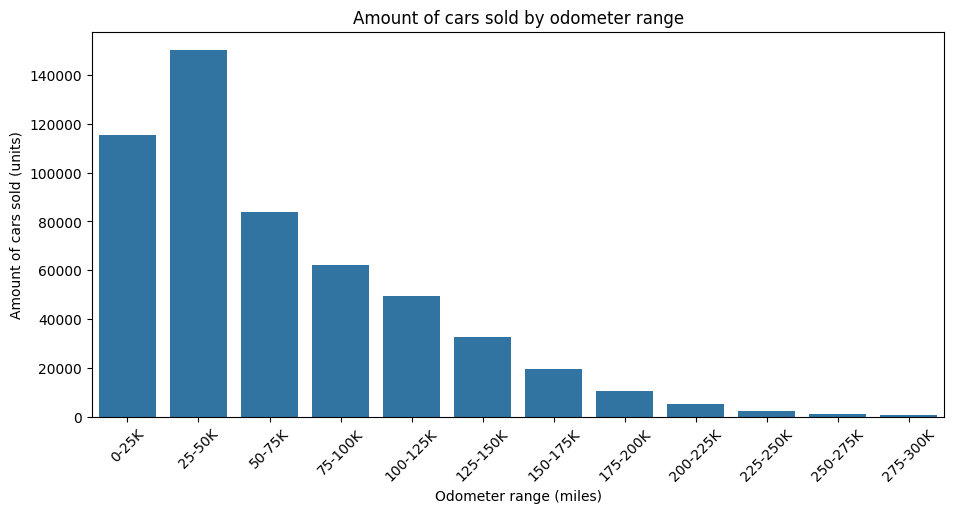

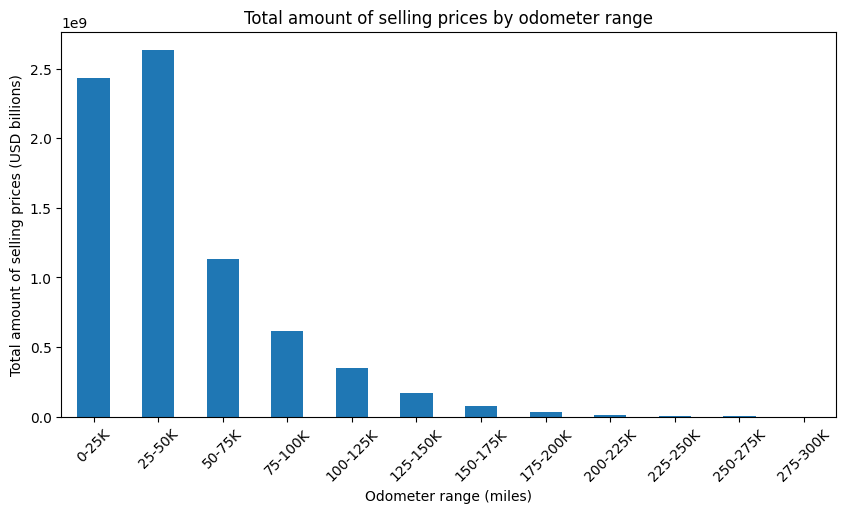

In [30]:
#let's show how may cars are sold for different range of odometer values
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000]
labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-125K', '125-150K', '150-175K', '175-200K', '200-225K', '225-250K', '250-275K', '275-300K']
df_clean['odometer_range'] = pd.cut(df_clean['odometer'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(11,5))
sns.countplot(data=df_clean, x='odometer_range', order=labels)
plt.title('Amount of cars sold by odometer range')
plt.xlabel('Odometer range (miles)')
plt.ylabel('Amount of cars sold (units)')
plt.xticks(rotation=45)
plt.show()

#let's show the total amount of selling prices by odometer range
df_clean.groupby('odometer_range')['selling_price'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Total amount of selling prices by odometer range')
plt.xlabel('Odometer range (miles)')
plt.ylabel('Total amount of selling prices (USD billions)')
plt.xticks(rotation=45)
plt.show()

In [31]:
#let's evaluate wich is the quota of the sold cars with an odomter value fewer that 50K miles
limiters = [25000, 50000]

for i in limiters:
 quota_50k_sold = df_clean[df_clean['odometer'] < i].shape[0] / df_clean.shape[0]
 print(f'The quota of the sold cars with an odometer value fewer than {round(i/1000)}K miles is {round(quota_50k_sold*100,2)}%')

 #let's evaluate wich is the quota of total USD gained fromthe seellings with an odomter value fewer that 50K miles
 quota_50k_gained = df_clean[df_clean['odometer'] < i]['selling_price'].sum() / df_clean['selling_price'].sum()
 print(f'The quota of the total USD gained from the sellings with an odometer value fewer than {round(i/1000)}K miles is {round(quota_50k_gained*100,2)}%\n')

The quota of the sold cars with an odometer value fewer than 25K miles is 21.6%
The quota of the total USD gained from the sellings with an odometer value fewer than 25K miles is 32.58%

The quota of the sold cars with an odometer value fewer than 50K miles is 49.75%
The quota of the total USD gained from the sellings with an odometer value fewer than 50K miles is 67.82%



From the analysis of the odometer values, we can say that the most sold vehicles and the most profitable vehicles have an odometer value between 25 and 50 thousand miles.

Considering the the vechicle with odomter fewer than 50 thousand miles, they represent the 49.75% of the total sold vehicles, and the 67.82% of the total USD generated by the sales.

2. Customer Preferences

Business Need: Identify what customers are looking for in used cars to optimize inventory and marketing strategies.

Possible Reports:
- Popular Makes and Models: Determine which car makers and models are the most popular based on sales volume.
- Condition vs. Price Correlation: Analyze how the condition of the vehicle (condition rating) correlates with its selling price to understand customer sensitivity to vehicle condition.
- Preferred Features: Look into trends regarding transmission type, body type, and trim options that are in high demand.

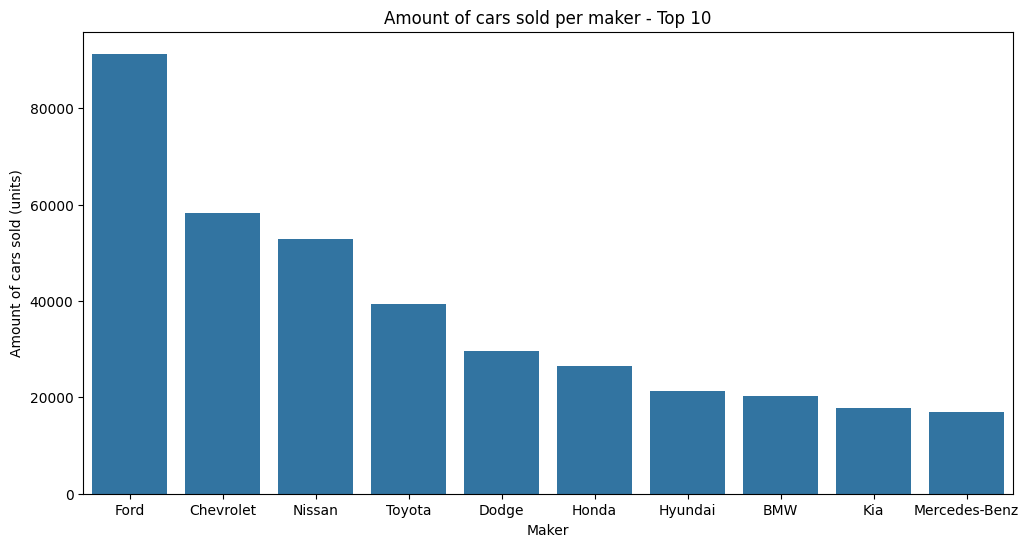

In [32]:
#let's graph the amount of cars sold per maker, showing the top 10 makers
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='maker', order=df_clean['maker'].value_counts().index[:10])
plt.title('Amount of cars sold per maker - Top 10')
plt.xlabel('Maker')
plt.ylabel('Amount of cars sold (units)')
plt.show()

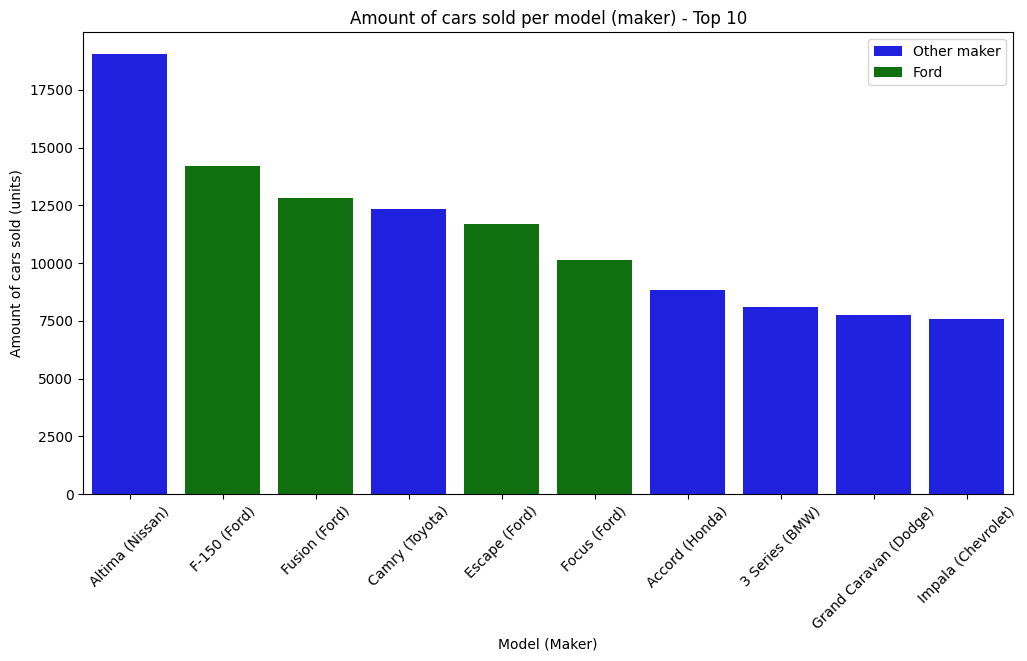

In [33]:
#le'ts create a new column "model_maker" with the model and the maker of the car
df_clean['model_maker'] = df_clean['model'] + ' (' + df_clean['maker'] + ')'

#let's graph the amount of cars sold per model, showing the top 10 models
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='model_maker', order=df_clean['model_maker'].value_counts().index[:10], palette=['green' if 'Ford' in x else 'blue' for x in df_clean['model_maker'].value_counts().index[:10]])
plt.title('Amount of cars sold per model (maker) - Top 10')
plt.xticks(rotation=45)
plt.xlabel('Model (Maker)')
plt.ylabel('Amount of cars sold (units)')
plt.legend(['Other maker','Ford'])
plt.show()

#let's drop the column "model_maker" since we will not use it anymore
df_clean.drop(columns=['model_maker'], inplace=True)

From the previous 2 graphs, is clear why Ford is the top maker in the dataset: 4 models (green bars) are in the top 6 model of the most sold ones. The most Ford's sold model is the Fusion model, which is also the 2nd most sold model in whole dataset.

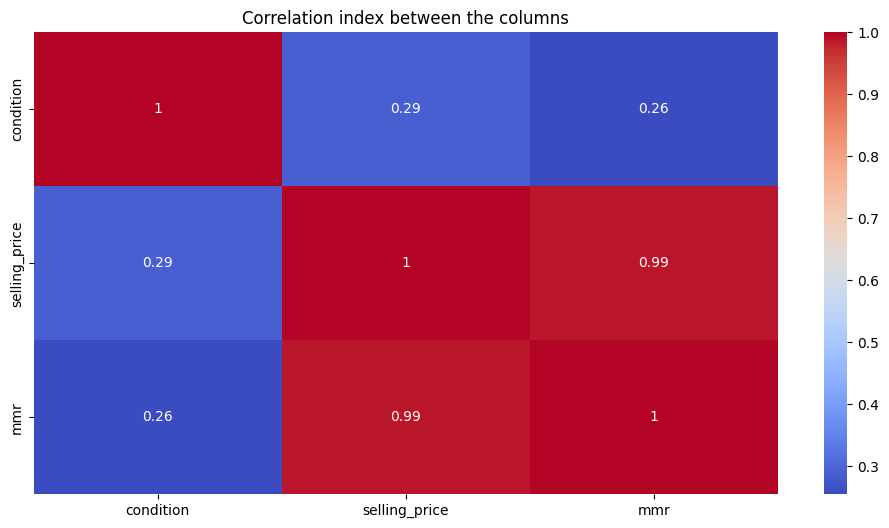

In [34]:
#caluculate the correlation between the columns "condition" and "selling_price"
corr = df_clean[['condition','selling_price','mmr']].corr()

#let's create a heatmap to visualize the correlation between the columns
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation index between the columns')
plt.show()

There is a very low correlation between the condition rating and the selling price. This is not surprising, as the condition rating is a subjective value, and it's not always related to the real condition of the vehicle. Same story for mmr value, since it's a reference value, and it's not always related to the real selling price.

To be sure, let's check stronger and obvious correlations. 

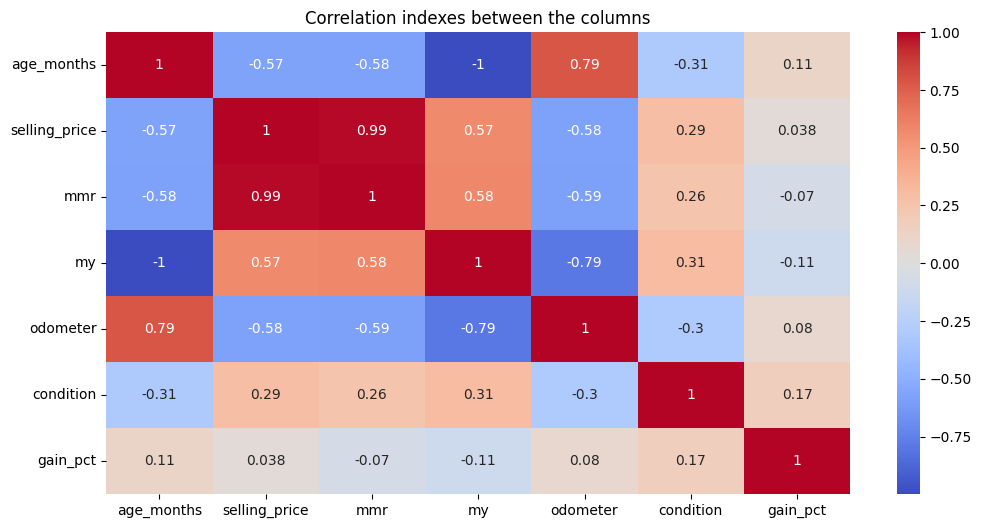

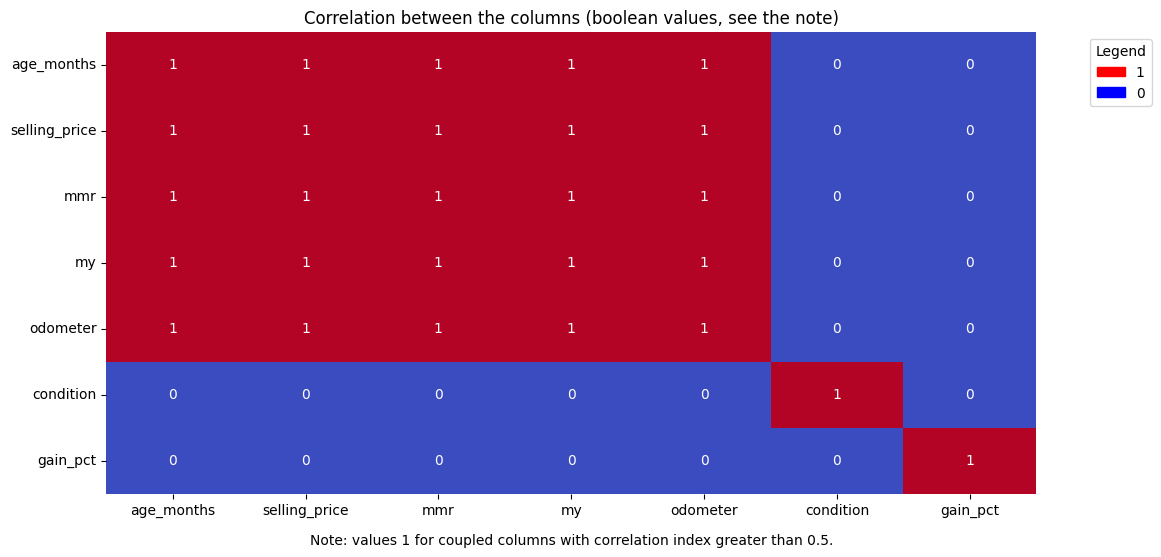

The columns with correlation index greater than 0.5 are: ['mmr', 'my', 'age_months', 'selling_price', 'odometer'] with the following correlation matrix:
                    mmr        my  age_months  selling_price  odometer
mmr            1.000000  0.583972   -0.582816       0.986673 -0.586009
my             0.583972  1.000000   -0.999070       0.573279 -0.789150
age_months    -0.582816 -0.999070    1.000000      -0.572171  0.788968
selling_price  0.986673  0.573279   -0.572171       1.000000 -0.582306
odometer      -0.586009 -0.789150    0.788968      -0.582306  1.000000


In [35]:
corr_multi = df_clean[['age_months','selling_price','mmr','my','odometer','condition','gain_pct']].corr()

corr_coeff = .5

#let's create a heatmap to visualize the correlation between the columns
plt.figure(figsize=(12,6))
sns.heatmap(corr_multi, annot=True, cmap='coolwarm')
plt.title('Correlation indexes between the columns')
plt.show()

#let's create a heatmap to visualize the correlation between the columns with a correlation greater than the coefficient corr_coeff

import matplotlib.patches as mpatches

corr_multi_filtered = abs(corr_multi) > corr_coeff
plt.figure(figsize=(12,6))
sns.heatmap(corr_multi_filtered, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between the columns (boolean values, see the note)')
note =f'Note: values 1 for coupled columns with correlation index greater than {corr_coeff}.'
plt.text(x=0.5, y=-0.1, s=note, ha='center', va='center', transform=plt.gca().transAxes)

legend_labels = [mpatches.Patch(color='red', label='1'), mpatches.Patch(color='blue', label='0')]
plt.legend(handles=legend_labels, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#let's create a new dataframe with the columns that have a correlation greater than coeff x
columns = corr_multi_filtered.columns
columns_filtered = []
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if corr_multi_filtered.iloc[i,j]:
            columns_filtered.append(columns[i])
            columns_filtered.append(columns[j])
            
columns_filtered = list(set(columns_filtered))

print('The columns with correlation index greater than', corr_coeff, 'are:', columns_filtered, 'with the following correlation matrix:')
print(corr_multi.loc[columns_filtered,columns_filtered])

---

3. Pricing Strategy

Business Need: develop a competitive pricing strategy that maximizes profit while remaining attractive to buyers.

Possible Reports:
- Price Distribution Analysis: examine the distribution of selling prices across different car makers, models, and years to identify typical pricing ranges.
- Geographical Pricing Differences: investigate if there are significant differences in selling prices based on the state of registration or location of the seller.

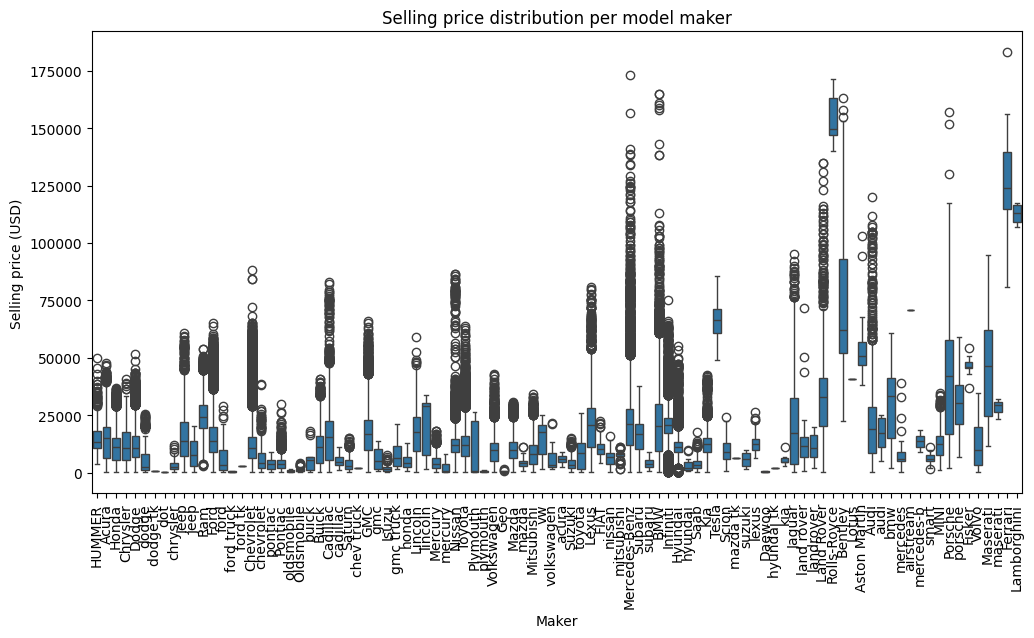

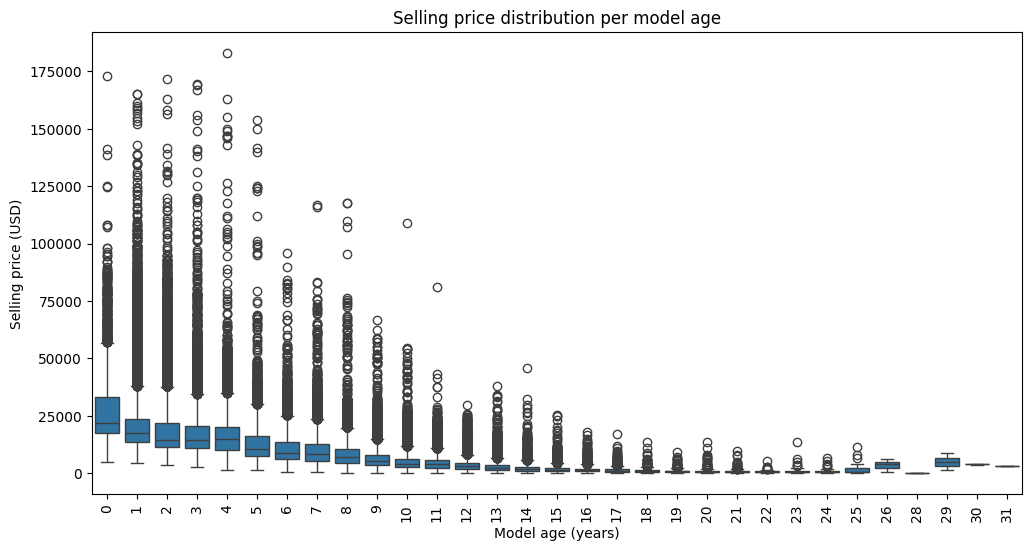

In [36]:
#let's create some graph with selling price ditribution per maker and model year
list_var = ['maker','age_years']

for i in list_var:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df_clean, x=i, y='selling_price')
    if i == 'maker':
        plt.title(f'Selling price distribution per model maker')
        plt.xlabel('Maker')
        plt.ylabel('Selling price (USD)')
    else:
        plt.title(f'Selling price distribution per model age')
        plt.xlabel('Model age (years)')
        plt.ylabel('Selling price (USD)')
    plt.xticks(rotation=90)
    plt.show()

The above graph clearly show the distribution of the selling price, per car model maker and model year. I've used a boxplot since it's the best way to show the distribution of the data, condensed in little space, and to show the outliers data. In the same time is possible to have a quick idea of the median, the 25th and 75th percentile, for each model maker and model year. Is also shown the range of data values of the not-outliers data.

Let's have a check to the z-scores of the selling prices, to see the amount of outliers in the dataset.

In [37]:
#identifying outliers using z-score
abs_z_scores = np.abs(stats.zscore(df_clean[['selling_price']]))

# identify outliers as z-scores greater than x standard deviations from the mean
outliers_coefficient = 3
outliers = (abs_z_scores > outliers_coefficient).any(axis = 1)

df_outliers = df_clean[outliers]
print(df_outliers.groupby(['maker',])['selling_price'].count().sort_values(ascending=False).head(5))
print(df_outliers.groupby(['age_years',])['selling_price'].count().sort_values(ascending=False).head(5))

maker
BMW              1390
Mercedes-Benz    1107
Porsche           666
Chevrolet         648
Ford              457
Name: selling_price, dtype: int64
age_years
1    2285
2    1706
3    1107
0    1060
4     280
Name: selling_price, dtype: int64


In [38]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 548300
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   my                 6715 non-null   int32         
 1   maker              6715 non-null   object        
 2   model              6715 non-null   object        
 3   trim               6715 non-null   object        
 4   category           6690 non-null   object        
 5   transmission       5792 non-null   object        
 6   vin                6715 non-null   object        
 7   state_sale         6715 non-null   object        
 8   condition          6695 non-null   float64       
 9   odometer           6715 non-null   float64       
 10  ext_color          6634 non-null   object        
 11  int_color          6634 non-null   object        
 12  seller             6715 non-null   object        
 13  mmr                6715 non-null   float64       
 14  selling_pri

In the majority of the cases, there is a considerable amount of outliers than have more than have the z-score more than 3 times the standard deviation, that may affect the mean value. So the median value is a better representation of the central tendency of the data.

So here are the median selling prices, per car maker and model year:

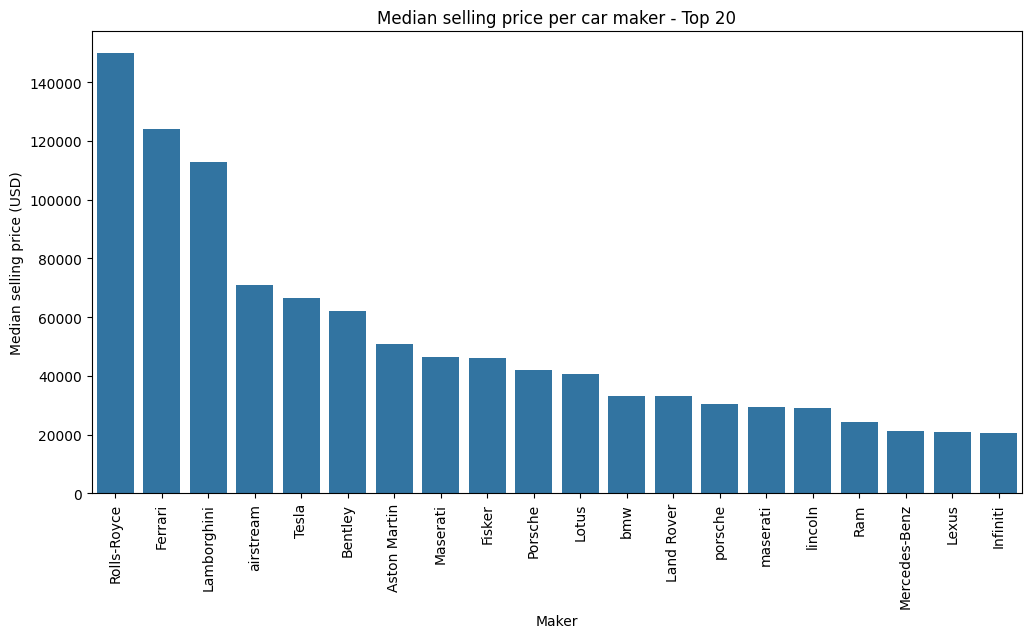

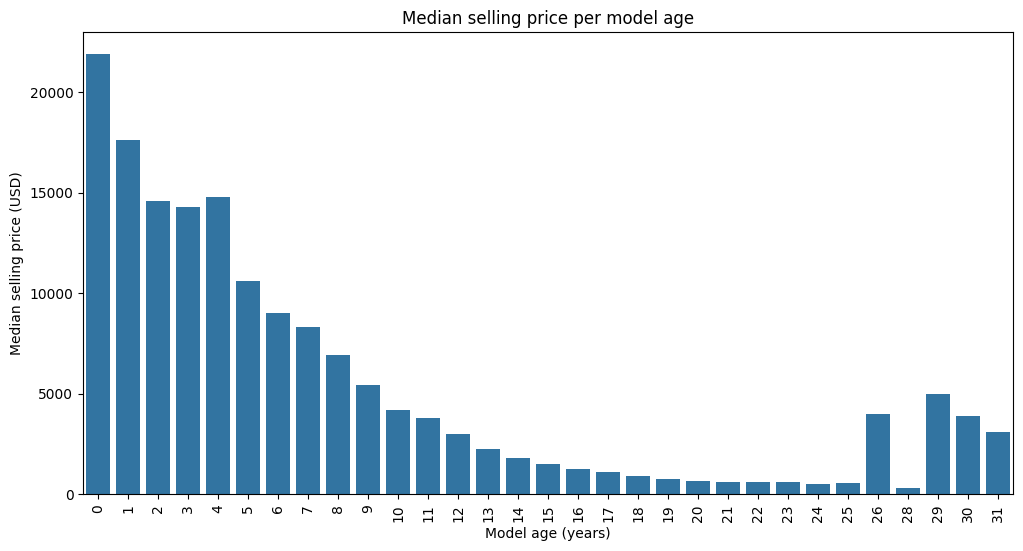

In [39]:
median_selling_price_per_car_maker = df_clean.groupby('maker')['selling_price'].median().sort_values(ascending=False)
#print(median_selling_price_per_car_maker)

top_x = 20
#let's create a graph to visualize the median selling price per car maker
plt.figure(figsize=(12,6))
sns.barplot(x=median_selling_price_per_car_maker.head(top_x).index, y=median_selling_price_per_car_maker.head(top_x))
plt.title(f'Median selling price per car maker - Top {top_x}')
plt.xlabel('Maker')
plt.ylabel('Median selling price (USD)')
plt.xticks(rotation=90)
plt.show()

median_selling_price_per_model_age = df_clean.groupby('age_years')['selling_price'].median().sort_values(ascending=False)
#print(median_selling_price_per_model_year)

#let's create a graph to visualize the median selling price per model year
plt.figure(figsize=(12,6))
sns.barplot(x=median_selling_price_per_model_age.index, y=median_selling_price_per_model_age)
plt.title('Median selling price per model age')
plt.xlabel('Model age (years)')
plt.ylabel('Median selling price (USD)')
plt.xticks(rotation=90)
plt.show()

Now let's check the geographical pricing differences.

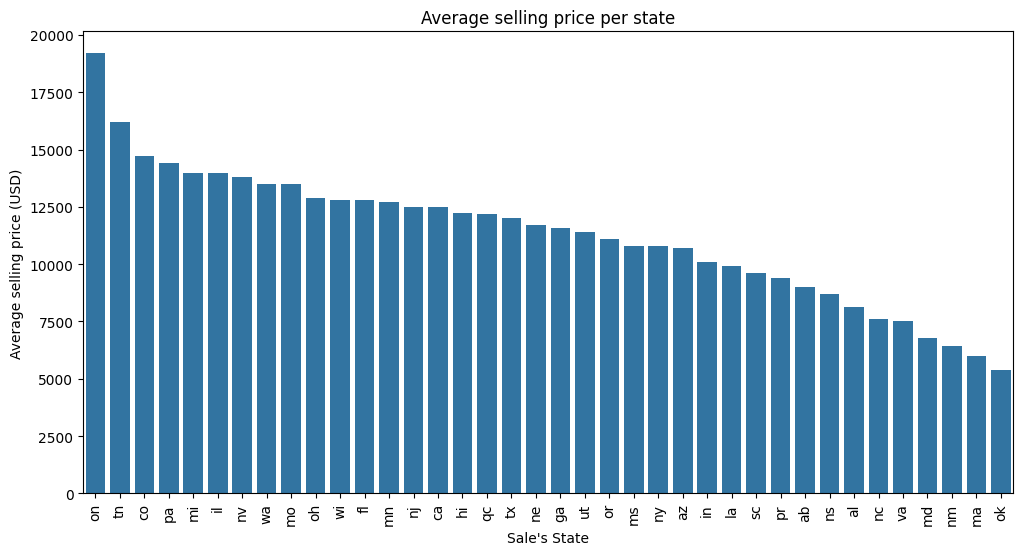

In [40]:
#graph the average selling price per state
median_prices = df_clean.groupby('state_sale')['selling_price'].median().reset_index
median_prices = median_prices().sort_values('selling_price', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=median_prices, x='state_sale', y='selling_price')
plt.title('Average selling price per state')
plt.xticks(rotation=90)
plt.xlabel("Sale's State")
plt.ylabel('Average selling price (USD)')
plt.show()

At this point is possible to list the most profitable states, based on the selling prices of the sales. But how is better to evaluate the profitability of a state? We could use the median selling price, or the mean selling price to compare each state's peformance. What is the better choice? Let's evalute the outliers in the selling prices for states.

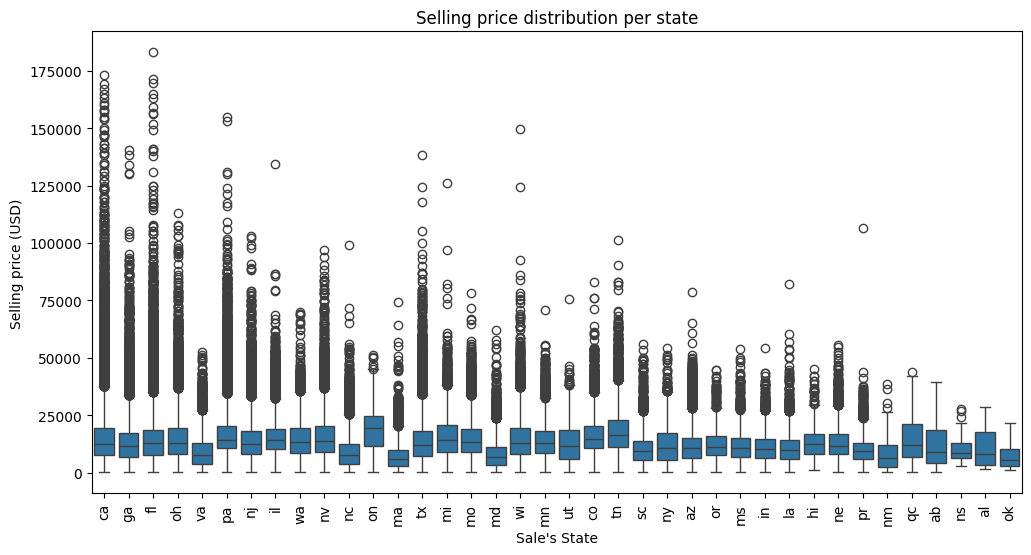

In [41]:
#let's create a boxplot to visualize the selling price median distribution per state
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='state_sale', y='selling_price')
plt.title('Selling price distribution per state')
plt.xlabel("Sale's State")
plt.ylabel('Selling price (USD)')
plt.xticks(rotation=90)
plt.show()


From the previous boxplot, showing the distribution of the selling price per state, is clear that the median selling price is a better indicator of the profitability of a state, as the mean selling price is influenced by the outliers...and there are a lot of them in some states. For this reason it's better to use the median selling price to evaluate the profitability of a state.

In [42]:
#let's create a list of profitable states made by all the states where the median selling price is higher than the global media of all the states
global_median_price = df_clean['selling_price'].median()
print(f'The global median price is: {global_median_price} USD')

median_prices_per_state = df_clean.groupby('state_sale')['selling_price'].median().reset_index().sort_values('selling_price', ascending=False)
median_prices_per_state.rename(columns={'selling_price':'median_selling_price'}, inplace=True)

profitable_states = median_prices_per_state[median_prices_per_state['median_selling_price'] > global_median_price]['state_sale'].tolist()
profitable_states = median_prices_per_state[median_prices_per_state['state_sale'].isin(profitable_states)].sort_values('median_selling_price', ascending=False)
profitable_states.rename(columns={'selling_price':'median_selling_price'}, inplace=True)

print(f'\nThe profitable states (with more than {global_median_price}) are:')
profitable_states



The global median price is: 12500.0 USD

The profitable states (with more than 12500.0) are:


,state_sale,median_selling_price
26,on,19200.0
32,tn,16200.0
4,co,14700.0
28,pa,14400.0
13,mi,14000.0
8,il,14000.0
22,nv,13800.0
36,wa,13500.0
15,mo,13500.0
24,oh,12900.0


Now we can affirm that due to our analysis, the most profitable states are:

In [43]:
list_profitable_state = profitable_states['state_sale'].tolist()
list_profitable_state

['on', 'tn', 'co', 'pa', 'mi', 'il', 'nv', 'wa', 'mo', 'oh', 'wi', 'fl', 'mn']

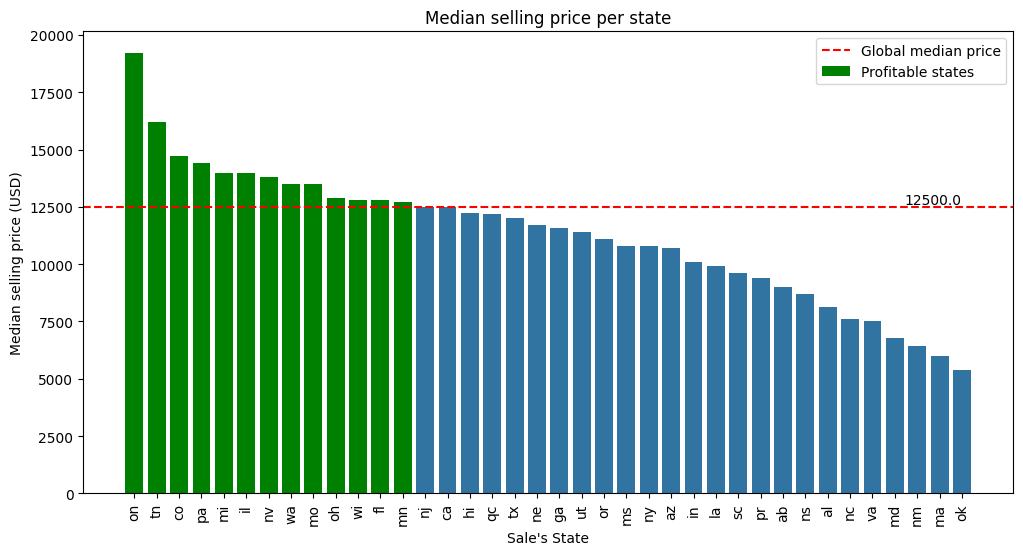

In [44]:
#let's create a graph the media selling price per state
plt.figure(figsize=(12,6))
sns.barplot(data=median_prices_per_state, x='state_sale', y='median_selling_price')
plt.title('Median selling price per state')
plt.xticks(rotation=90)
plt.xlabel("Sale's State")
plt.ylabel('Median selling price (USD)')

#let's add a line to show the global median price in the graph
plt.axhline(global_median_price, color='red', linestyle='--', label='Global median price')
#let's highlight the profitable states in the graph
plt.bar(profitable_states['state_sale'], profitable_states['median_selling_price'], color='green', label='Profitable states')
#let's add the value of the global median price above the line on the right side
plt.text(x=len(median_prices_per_state)-1, y=global_median_price, s=round(global_median_price,2), ha='right', va='bottom')

#add the legend to the graph
plt.legend()

plt.show()

In this last graph is shown in green the most profitable states, based on the global median selling price: the most profitable states are the ones with an higher median selling price, compared to the global median selling price of whole data set.

---

4. Vehicle Depreciation Analysis

Business Need: Understand how different vehicles depreciate over time to inform resale value projections.

Possible Reports:
- Depreciation by Maker: calculate the depreciation rates for different makes and models based on the difference between MMR values and original sale prices over time.
- Impact of Odometer Reading on Depreciation: analyze how odometer readings affect the depreciation rate, focusing on different segments of the market (e.g., luxury vs. economy cars).
- Residual Value Predictions: create a model to predict the residual value of a vehicle after a certain period, based on factors like make, model, year, condition, and mileage.

Let's start with the depreciation by maker.

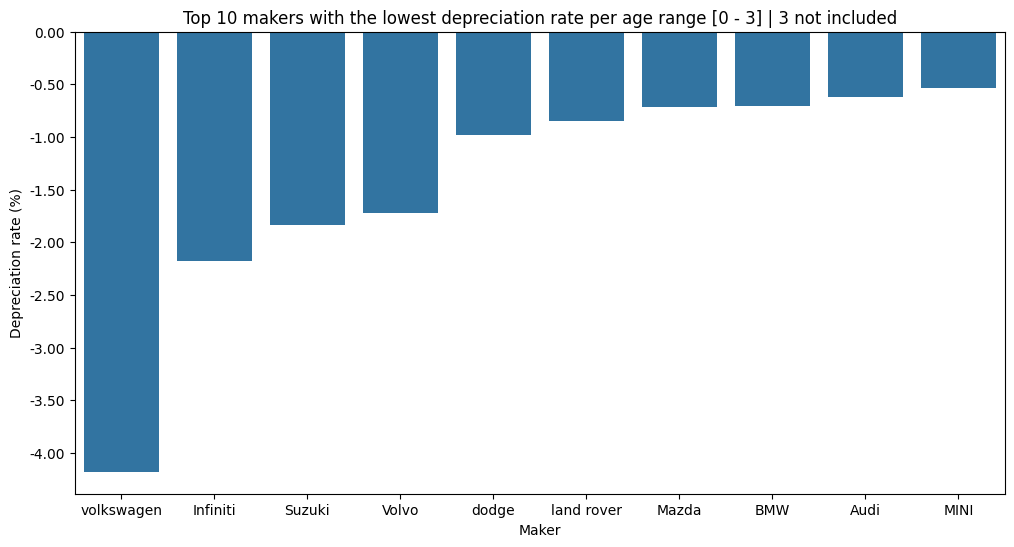

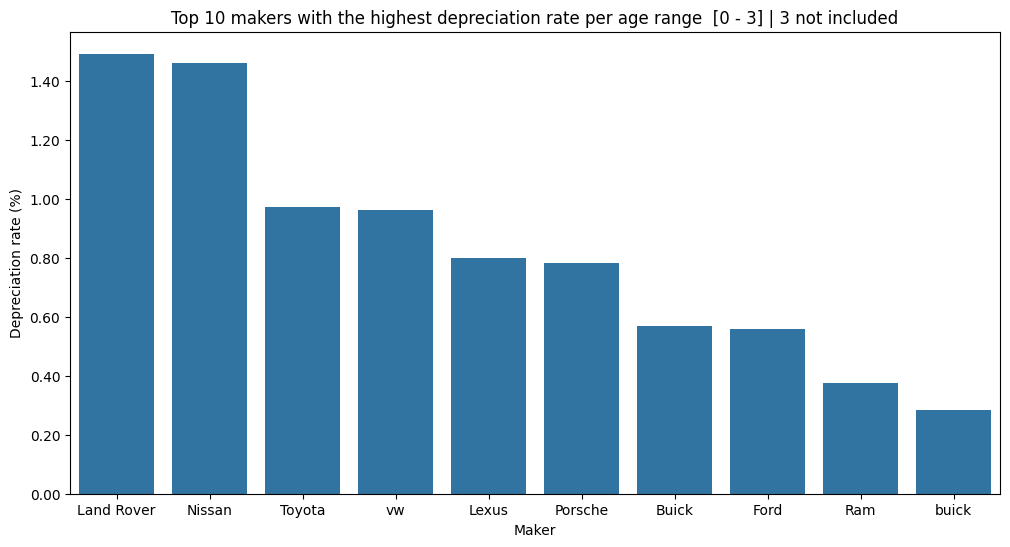

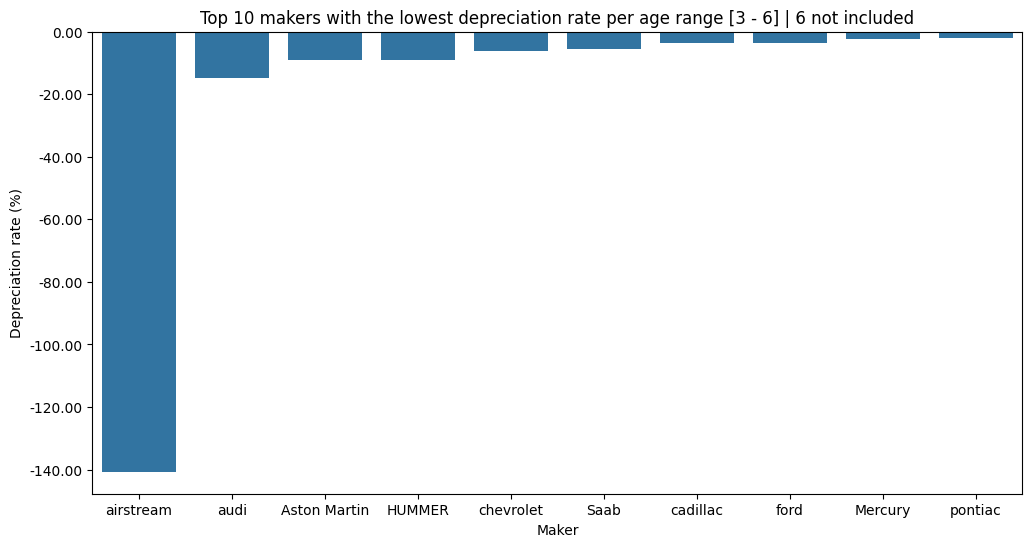

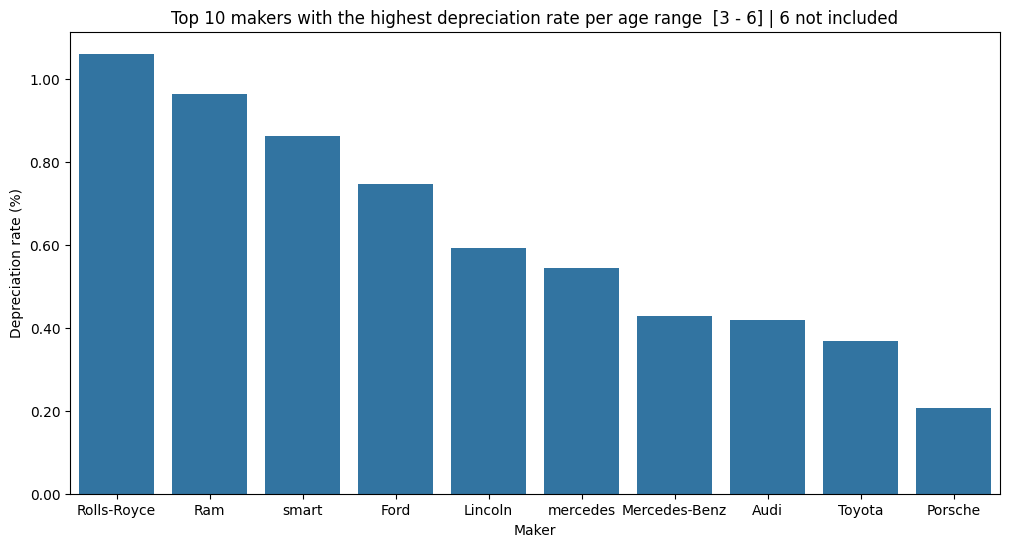

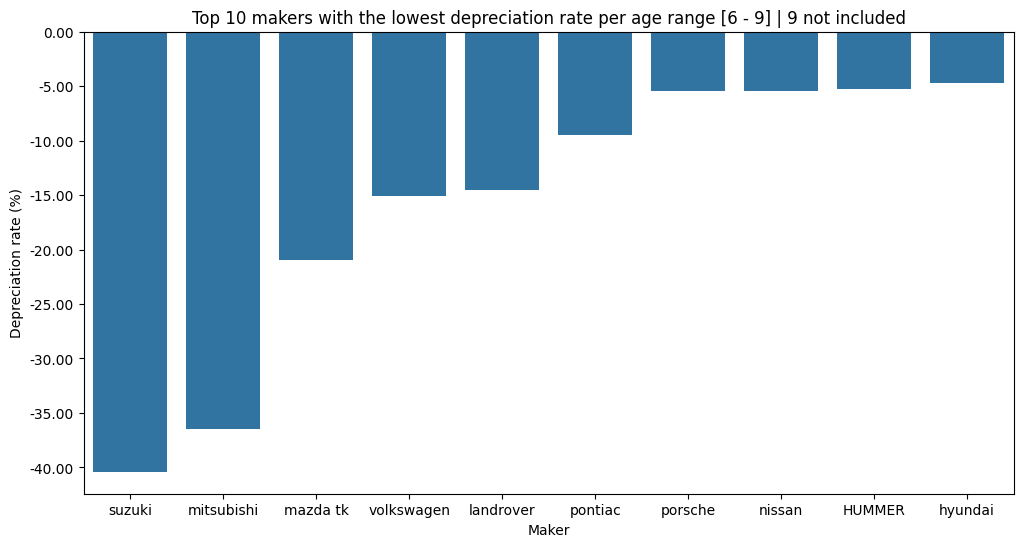

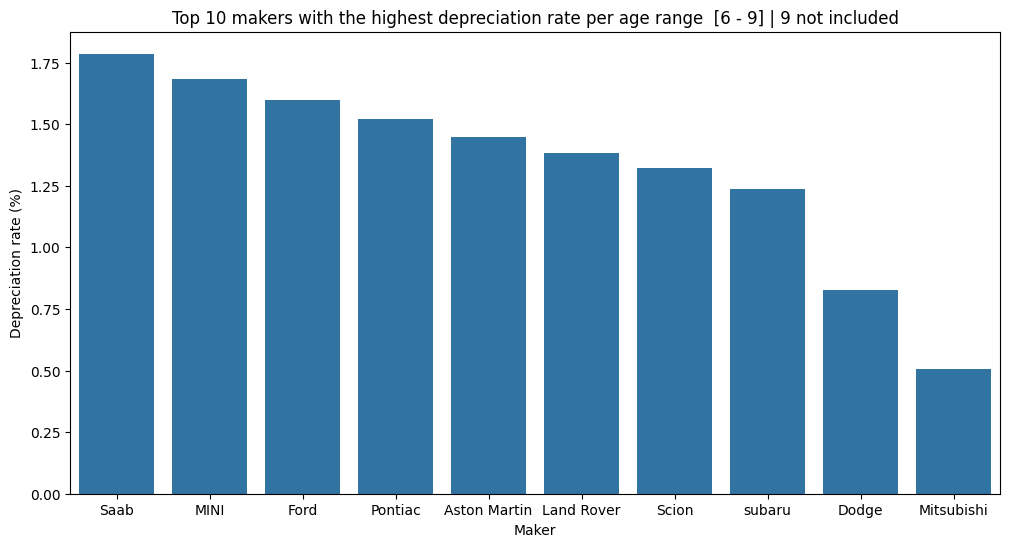

In [45]:
import matplotlib.ticker as mticker

#let's create sub-dataframes due to the age of the car
age_ranges = [(0, 3), (3, 6), (6, 9)]
df_age_dict = {}

for start, end in age_ranges:
    df_age_dict[f'df_age_{start}_{end}'] = df_clean[(df_clean['age_years'] >= start) & (df_clean['age_years'] < end)]

#let's calculate the depreciation rate per maker and model each for the fisrt X makers
x = 10
df_depreciation_negative_dict = {}
df_depreciation_positive_dict = {}

for key, df_age in df_age_dict.items():
    df_depreciation_grouped = df_age.groupby(['maker'])[['selling_price', 'mmr']].median().reset_index()
    df_depreciation_grouped['depreciation_pctg'] = round(((df_depreciation_grouped['mmr'] - df_depreciation_grouped['selling_price']) / df_depreciation_grouped['mmr']) * 100, 3)
    df_depreciation_grouped = df_depreciation_grouped.sort_values('depreciation_pctg', ascending=True)
    
    df_depreciation_negative_dict[key] = df_depreciation_grouped[df_depreciation_grouped['depreciation_pctg'] < 0]
    df_depreciation_positive_dict[key] = df_depreciation_grouped[df_depreciation_grouped['depreciation_pctg'] > 0]

#let's graph the depreciation rate per maker for the first X makers
for key in df_age_dict.keys():
    df_depreciation_negative_head = df_depreciation_negative_dict[key].head(x).sort_values('depreciation_pctg', ascending=True)
    df_depreciation_positive_head = df_depreciation_positive_dict[key].head(x).sort_values('depreciation_pctg', ascending=False)
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_depreciation_negative_head, x='maker', y='depreciation_pctg')
    plt.title(f'Top {x} makers with the lowest depreciation rate per age range [{key[7:8]} - {key[9:10]}] | {key[9:10]} not included')
    plt.xlabel('Maker')
    plt.ylabel('Depreciation rate (%)')
    plt.xticks(rotation=0)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.show()
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_depreciation_positive_head, x='maker', y='depreciation_pctg')
    plt.title(f'Top {x} makers with the highest depreciation rate per age range  [{key[7:8]} - {key[9:10]}] | {key[9:10]} not included')
    plt.xlabel('Maker')
    plt.ylabel('Depreciation rate (%)')
    plt.xticks(rotation=0)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.show()

From the previous graphs is shown the depreciation percentages of the vehicles, based on the age of the vehicle, grouped by model maker and model age.

The depreciation is calculated as the difference between the selling price and the mmr value, divided by the mmr value. Since the depreciation is heavily influnced by the model age, I've clustered the data in 3 groups: 0-3 years, 3-6 years and 6-9 years.

Let's now check at the top 10 makers, with lowest and highest depreciation rates, without considering the model age.


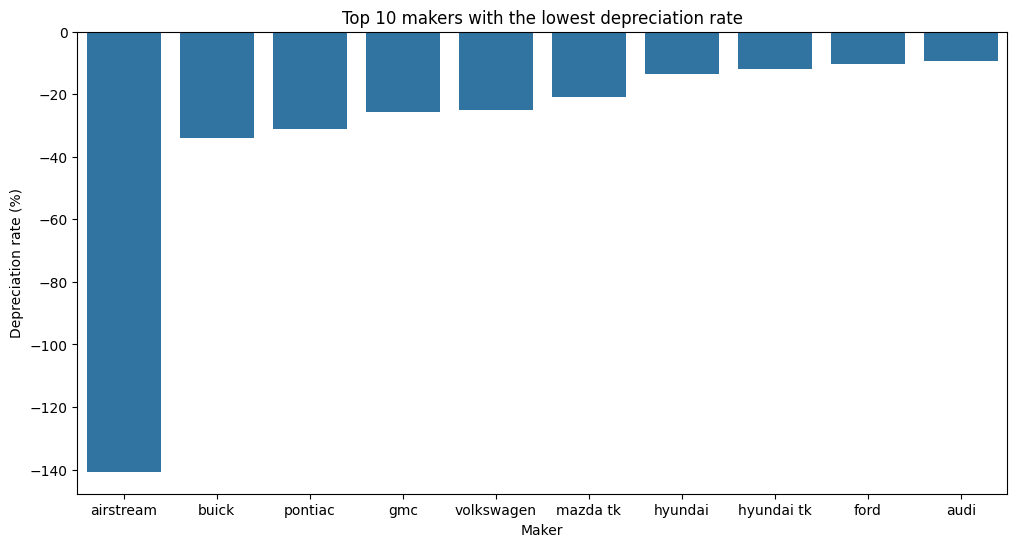

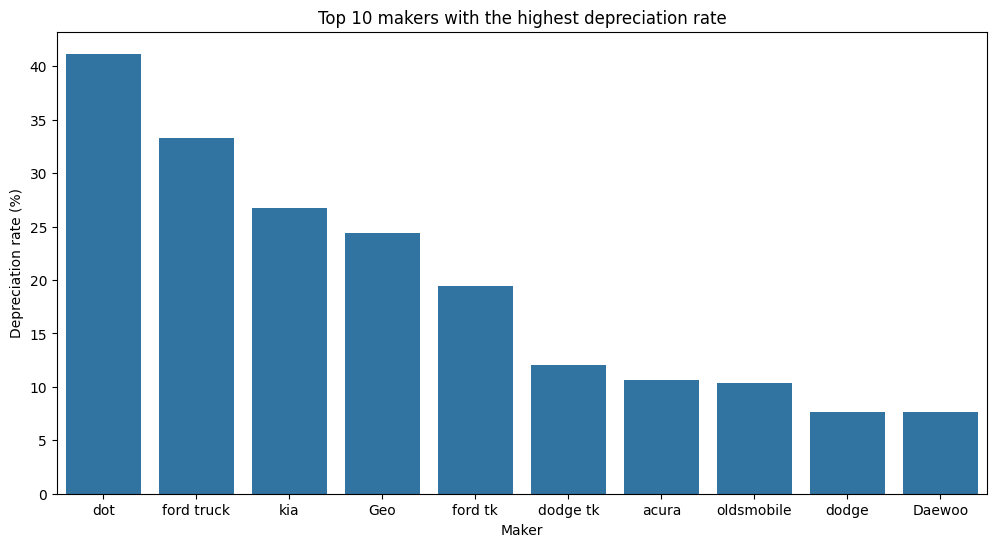

In [46]:
#let's now check at the top 10 makers, whit lowest and highest depreciation rates, without considering the model age
df_depreciation = df_clean.groupby(['maker'])[['selling_price', 'mmr']].median().reset_index()

df_depreciation['depreciation_pctg'] = round(((df_depreciation['mmr'] - df_depreciation['selling_price']) / df_depreciation['mmr']) * 100, 3)

dfdepreiation_positive_head = df_depreciation[df_depreciation['depreciation_pctg'] > 0].sort_values('depreciation_pctg', ascending=False).head(x)

dfdepreiation_negative_head = df_depreciation[df_depreciation['depreciation_pctg'] < 0].sort_values('depreciation_pctg', ascending=True).head(x)

#let's graph the top x makers with the lowest and highest depreciation rate
plt.figure(figsize=(12,6))
sns.barplot(data=dfdepreiation_negative_head, x='maker', y='depreciation_pctg')
plt.title(f'Top {x} makers with the lowest depreciation rate')
plt.xlabel('Maker')
plt.ylabel('Depreciation rate (%)')
plt.xticks(rotation=0)

plt.figure(figsize=(12,6))
sns.barplot(data=dfdepreiation_positive_head, x='maker', y='depreciation_pctg')
plt.title(f'Top {x} makers with the highest depreciation rate')
plt.xlabel('Maker')
plt.ylabel('Depreciation rate (%)')
plt.xticks(rotation=0)
plt.show()

---

## Answers and Conclusions <a name="answers-and-conclusions"></a>

1. Market Trends:
 - About a third of sales are vehicles that are 4 years or younger, indicating that newer vehicles (4 years or younger) dominate the used market.
 - The most sold and profitable cars are the ones with max 50K miles: the quota of the sold cars quota is 49.75%, and the quota of the total USD gained is 67.82%
2. Customer Preferences:
 - Most Popular Makes and Models: Ford is the top-selling brand with 4 models in the top 6. The top-selling model is the Ford Fusion.
 - Vehicle Price and Condition: The correlation between vehicle condition and sales price is low, indicating that condition assessment does not have much impact on the final price.
3. Pricing Strategy:
 - The sold cars that are have a model age less than 3 years generate 48% of total amount of USD income.
 - The most profitable states for car sales are Tennessee, Colorado and Illinois, where median prices exceed the global average of $12,400.
4. Vehicle Depreciation:
 - Vehicles between 0 and 3 years old show less loss of value than older vehicles.
 - Some brands, such as BMW and Mercedes-Benz, tend to retain their value better, while other brands show higher rates of depreciation.